In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('example.csv')
df

,Outlook,Temperature,Routine,Need Cloth
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [3]:
x = df.drop('Need Cloth', axis=1)
x.head()

,Outlook,Temperature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [4]:
y = df['Need Cloth']
y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Need Cloth, dtype: object

# Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder 

In [6]:
encoder = LabelEncoder()

In [7]:
x = x.apply(encoder.fit_transform) # convert all columns

In [8]:
x

,Outlook,Temperature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


# Decision Tree Model

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dec_tree = DecisionTreeClassifier()

In [11]:
dec_tree.fit(x,y)

DecisionTreeClassifier()

In [12]:
# predict the output
# temp -> cold, outdoor -> sunny, routine -> indoor
dec_tree.predict([[0, 0, 0]])

array(['Yes'], dtype=object)

In [13]:
col = x.columns

[Text(297.59999999999997, 380.52, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(223.2, 271.8, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(148.79999999999998, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(74.39999999999999, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.2, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(297.59999999999997, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(371.99999999999994, 271.8, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

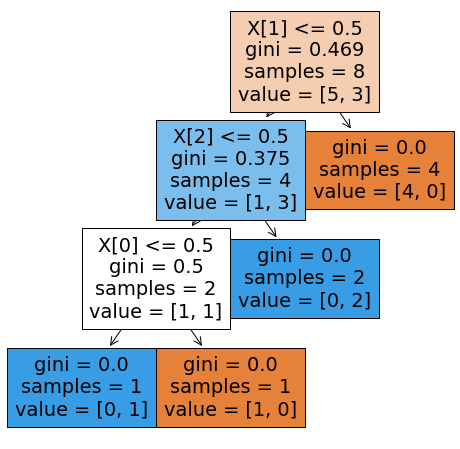

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(8,8))
tree.plot_tree(dec_tree, filled=True)

[Text(297.59999999999997, 380.52, 'Temperature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(223.2, 271.8, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(148.79999999999998, 163.07999999999998, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(74.39999999999999, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.2, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(297.59999999999997, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(371.99999999999994, 271.8, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

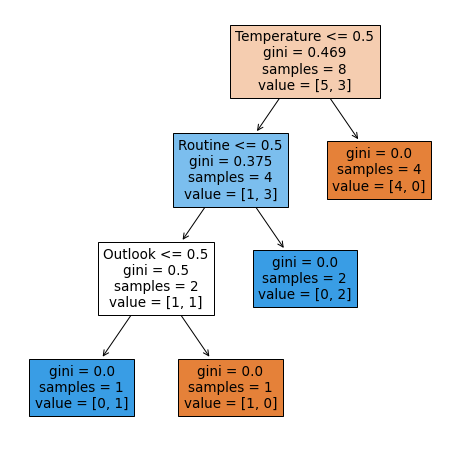

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(8,8))
tree.plot_tree(dec_tree, filled=True, feature_names=col)

In [16]:
text = tree.export_text(dec_tree)
print(text)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: Yes
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: No
|   |--- feature_2 >  0.50
|   |   |--- class: Yes
|--- feature_1 >  0.50
|   |--- class: No

